# Redes Neurais

### Informações

**Instituto Federal de Educação, Ciência e Tecnologia do Ceará** \
**Disciplina:** Inteligência Artificial \
**Professor:** Amauri Holanda de Souza Júnior \
**Dupla:**
- Elias de Almeida Sombra Neto
- Rai Ferreira Lima de Araújo

### Questão 1: Regressão Linear

Implemente um modelo de regressão linear. Para isso, utilize um conjunto de dados sintético gerado com a equação:

<p align="center">
y = 3x + 5 + ε
</p>

Onde x segue distribuição uniforme entre -10 e 10 e ε é um ruído gaussiano com média zero e desvio padrao de 2.

Faça os seguintes passos:

1. Gere um conjunto de dados com pelo menos 100 pontos.
2. Divida os dados em treino (80%) e teste (20%).
3. Implemente modelos de regressão linear empregando:
    - A solução de mínimos quadrados (pseudo-inversa).
    - Uma rede neural com uma camada treinada via gradiente descendente utilizando MSE-Loss (Erro Quadrático Médio) e otimizador SGD.
4. Apresente as soluções para cada um dos métodos acima.
5. Avalie o desempenho dos modelos e visualize os resultados.


In [1]:
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [2]:
os.makedirs("resultados", exist_ok=True)

In [3]:
# Configurar sementes para reprodutibilidade
np.random.seed(0)
torch.manual_seed(0)

In [4]:
# Função para gerar dados sintéticos
def generate_synthetic_data(N, a=3, b=5, sigma=2):
    x = np.random.uniform(-10, 10, N)
    epsilon = np.random.normal(0, sigma, N)
    y = a * x + b + epsilon
    return x, y

In [5]:
# Função para normalizar os dados
def normalize_data(x_train, x_test):
    mean = x_train.mean()
    std = x_train.std()
    x_train_normalized = (x_train - mean) / std
    x_test_normalized = (x_test - mean) / std
    return x_train_normalized, x_test_normalized

In [6]:
# Função para adicionar termo de bias
def add_bias_term_torch(x):
    ones = torch.ones((x.shape[0], 1))  # Criar uma coluna de 1s
    return torch.cat((ones, x), dim=1)  # Concatenar no eixo das colunas (dim=1)

In [7]:
# Função para calcular a pseudo-inversa
def calculate_pseudo_inverse_torch(X_train, y_train):
    return torch.linalg.pinv(X_train) @ y_train  #

In [8]:
# Função para visualizar as perdas durante o treinamento
def plot_losses(losses):
    plt.plot(losses)
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Perda durante o treinamento')
    plt.grid(True)
    plt.savefig("resultados/q1-visualizacao-de-perdas.png")  
    plt.show()

In [9]:
# Função para visualizar os resultados
def plot_results(x, y, y_pred_pinv, y_pred_nn, train_size):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

    # Gráfico 1: Pseudo-Inversa
    axs[0].scatter(x, y, label="Dados reais", alpha=0.6, color='blue')  
    axs[0].plot(x[train_size:], y_pred_pinv, label="Pseudo-Inversa", color="red", linewidth=2) 
    axs[0].set_title("Pseudo-Inversa")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].grid(True)
    axs[0].legend()

    # Gráfico 2: Rede Neural
    axs[1].scatter(x, y, label="Dados reais", alpha=0.6, color='blue')  
    axs[1].plot(x[train_size:], y_pred_nn, label="Rede Neural", color="yellow", linewidth=2)  
    axs[1].set_title("Rede Neural")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("y")
    axs[1].grid(True)
    axs[1].legend()

    plt.suptitle("Regressão Linear: Pseudo-Inversa vs Rede Neural", fontsize=16)
    plt.tight_layout()  
    plt.subplots_adjust(top=0.85) 
    plt.savefig("resultados/Q1-regressao_linear_comparacao.png")
    plt.show()  

In [10]:
# Implementação com Rede Neural
class LinearRegressionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

In [11]:
# Função para treinar a rede neural
def train_neural_network(X_train_torch, y_train_torch, epochs=1000, lr=0.01):
    model = LinearRegressionNN()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train_torch)
        loss = criterion(y_pred, y_train_torch)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 100 == 0:
         print(f'Época {epoch}, Erro: {loss.item():.4f}')

    return model, losses

Coeficientes da regressão (Mínimos Quadrados): [ 3.3604715 17.999378 ]
Época 0, Erro: 335.8747
Época 100, Erro: 9.4955
Época 200, Erro: 3.7551
Época 300, Erro: 3.6542
Época 400, Erro: 3.6524
Época 500, Erro: 3.6524
Época 600, Erro: 3.6524
Época 700, Erro: 3.6524
Época 800, Erro: 3.6524
Época 900, Erro: 3.6524


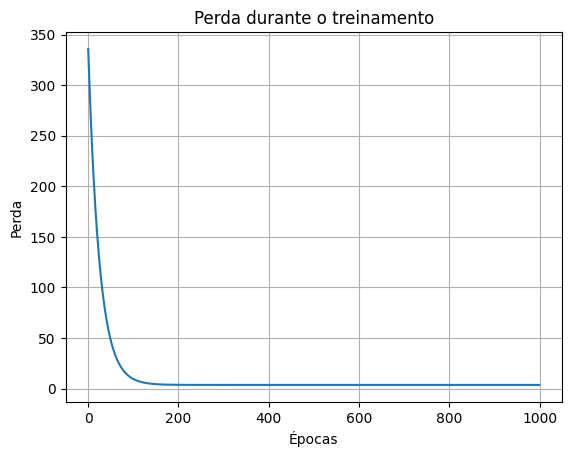

Coeficientes da Rede Neural: w = 17.999332427978516 , b = 3.360466241836548
MSE (Pseudo-Inversa): 5.4001
MSE (Rede Neural): 5.4001


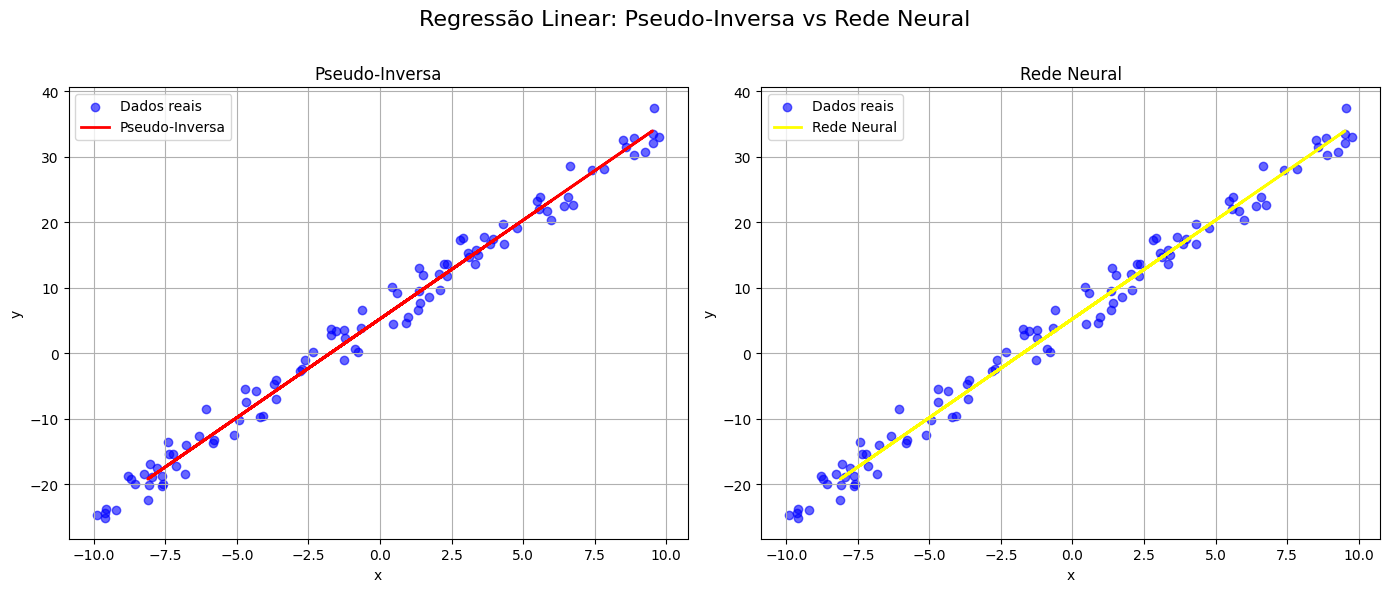

In [12]:
N = 100
x, y = generate_synthetic_data(N)

x, y = shuffle(x, y, random_state=0)

# Dividir os dados em treino e teste
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Dividir os dados em treino (80%) e teste (20%)
train_size = int(0.8 * N)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

x_train, x_test = normalize_data(x_train, x_test)

X_train = add_bias_term_torch(torch.tensor(x_train, dtype=torch.float32).view(-1, 1))
X_test = add_bias_term_torch(torch.tensor(x_test, dtype=torch.float32).view(-1, 1))

# Regressão Linear via Pseudo-Inversa
theta = calculate_pseudo_inverse_torch(X_train, torch.tensor(y_train, dtype=torch.float32).view(-1, 1))
print("Coeficientes da regressão (Mínimos Quadrados):", theta.numpy().flatten())

# Previsões no conjunto de teste
y_pred_pinv = X_test @ theta

X_train_torch = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)

# Treinamento da Rede Neural
model, losses = train_neural_network(X_train_torch, y_train_torch)

plot_losses(losses)

w_nn, b_nn = model.linear.weight.item(), model.linear.bias.item()
print("Coeficientes da Rede Neural: w =", w_nn, ", b =", b_nn)

y_pred_nn = model(X_test_torch).detach().numpy()

mse_pinv = mean_squared_error(y_test, y_pred_pinv)
mse_nn = mean_squared_error(y_test, y_pred_nn)

print(f"MSE (Pseudo-Inversa): {mse_pinv:.4f}")
print(f"MSE (Rede Neural): {mse_nn:.4f}")

plot_results(x, y, y_pred_pinv, y_pred_nn, train_size)

### Questão 2: Regressão Logística para Classificação Binária

Implemente um modelo de regressao logistica para resolver um problema de classificação binária utilizando um conjunto de dados sintético.

Faça os seguintes passos:
- Utilize a função  make_classification da biblioteca Scikit-Learn para gerar um conjunto de dados com 500 amostras, 2 variáveis preditoras e 2 classes.
- Divida os dados em treino (70%) e teste (30%).
- Implemente um modelo de regressão logística.
- Treine o modelo utilizando gradiente descendente (versão não-estocástica) (conforme visto em sala).
- Avalie a acurácia no conjunto de teste e visualize a fronteira de decisão do classificador.


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [14]:
os.makedirs("resultados", exist_ok=True)

In [15]:
# Gerando os dados sintéticos
np.random.seed(0)

In [16]:
# Gerando os dados
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Convertendo para tensores
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Tornar y_tensor 2D

In [17]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

In [18]:

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

def train_logistic_regression(X_train, y_train, epochs=1000, lr=0.01):
    model = LogisticRegression()
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        loss = criterion(model(X_train), y_train)
        loss.backward()
        optimizer.step()
        print("Epoch", epoch + 1, "/", epochs)
    
    return model

In [19]:
# Treina o modelo
model = train_logistic_regression(X_train, y_train, epochs=1000, lr=0.01)

# Avalia o modelo
model.eval()
with torch.no_grad():
    y_pred = model(X_test).round()
    accuracy = (y_pred == y_test).float().mean().item()
print("Acurácia:", accuracy)

# Gera a grade para a fronteira de decisão
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Converte para tensor e faz a previsão
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = model(grid).reshape(xx.shape)

Epoch 1 / 1000
Epoch 2 / 1000
Epoch 3 / 1000
Epoch 4 / 1000
Epoch 5 / 1000
Epoch 6 / 1000
Epoch 7 / 1000
Epoch 8 / 1000
Epoch 9 / 1000
Epoch 10 / 1000
Epoch 11 / 1000
Epoch 12 / 1000
Epoch 13 / 1000
Epoch 14 / 1000
Epoch 15 / 1000
Epoch 16 / 1000
Epoch 17 / 1000
Epoch 18 / 1000
Epoch 19 / 1000
Epoch 20 / 1000
Epoch 21 / 1000
Epoch 22 / 1000
Epoch 23 / 1000
Epoch 24 / 1000
Epoch 25 / 1000
Epoch 26 / 1000
Epoch 27 / 1000
Epoch 28 / 1000
Epoch 29 / 1000
Epoch 30 / 1000
Epoch 31 / 1000
Epoch 32 / 1000
Epoch 33 / 1000
Epoch 34 / 1000
Epoch 35 / 1000
Epoch 36 / 1000
Epoch 37 / 1000
Epoch 38 / 1000
Epoch 39 / 1000
Epoch 40 / 1000
Epoch 41 / 1000
Epoch 42 / 1000
Epoch 43 / 1000
Epoch 44 / 1000
Epoch 45 / 1000
Epoch 46 / 1000
Epoch 47 / 1000
Epoch 48 / 1000
Epoch 49 / 1000
Epoch 50 / 1000
Epoch 51 / 1000
Epoch 52 / 1000
Epoch 53 / 1000
Epoch 54 / 1000
Epoch 55 / 1000
Epoch 56 / 1000
Epoch 57 / 1000
Epoch 58 / 1000
Epoch 59 / 1000
Epoch 60 / 1000
Epoch 61 / 1000
Epoch 62 / 1000
Epoch 63 / 1000
E

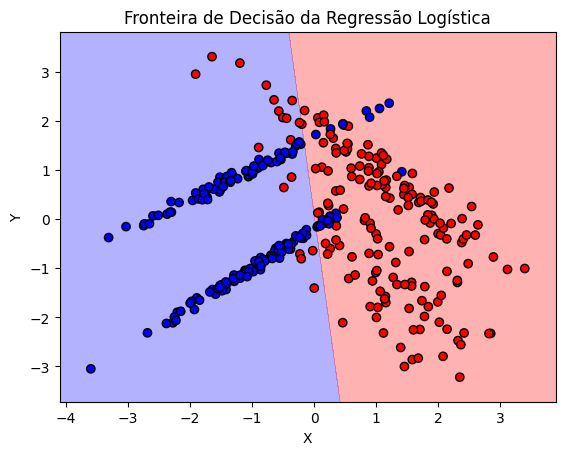

In [20]:
# Plota os dados e a fronteira de decisão
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr", edgecolors="k")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fronteira de Decisão da Regressão Logística")
plt.savefig("resultados/q2-fronteira-de-decisao.png")
plt.show()


### Questão 3: Classificação Binária com uma MLP e Seleção de Neurônios

Implemente uma rede neural do tipo MLP para a tarefa de classificação binária. Nesta questão, você deve usar um conjunto de validação para selecionar o número adequado de neurônios na camada oculta.

Faça os seguintes passos:
- Utilize a função make_moons da biblioteca Scikit-Learn para gerar um conjunto de dados com 500 amostras.
- Divida os dados em treino (70%), validação (15%) e teste (15%).
- Implemente uma MLP com:
    - Uma camada oculta com n neurônios e ativação ReLU.
    - Uma camada de saída com 1 neurônio e ativação sigmoid.
    - Utilize a função de perda BCELoss e o otimizador Adam ou SGD.
- Treine modelos com diferentes números de neurônios na camada oculta (exemplo: 5, 10, 20, 50).
- Plote a evolução da função custo (loss) ao longo do treinamento (épocas).
- Escolha o melhor número de neurônios com base na menor perda no conjunto de validação.
- Avalie o modelo escolhido no conjunto de teste e visualize a fronteira de decisão.

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [22]:
os.makedirs("resultados", exist_ok=True)

In [23]:
# Gerar dados
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

In [24]:
# Divisão dos dados
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [25]:
# Converter para tensores
def to_tensor(data):
    return torch.tensor(data, dtype=torch.float32)

X_train, y_train = to_tensor(X_train), to_tensor(y_train)
X_val, y_val = to_tensor(X_val), to_tensor(y_val)
X_test, y_test = to_tensor(X_test), to_tensor(y_test)

In [26]:
# Definição da rede MLP
class MLP(nn.Module):
    def __init__(self, n_neurons):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, n_neurons)
        self.output = nn.Linear(n_neurons, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

In [27]:
#Treinamento da rede
def train_model(n_neurons, epochs=1000, lr=0.01):
    model = MLP(n_neurons)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    losses = []
    val_losses = []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
            val_losses.append(val_loss.item())
    
    return model, losses, val_losses

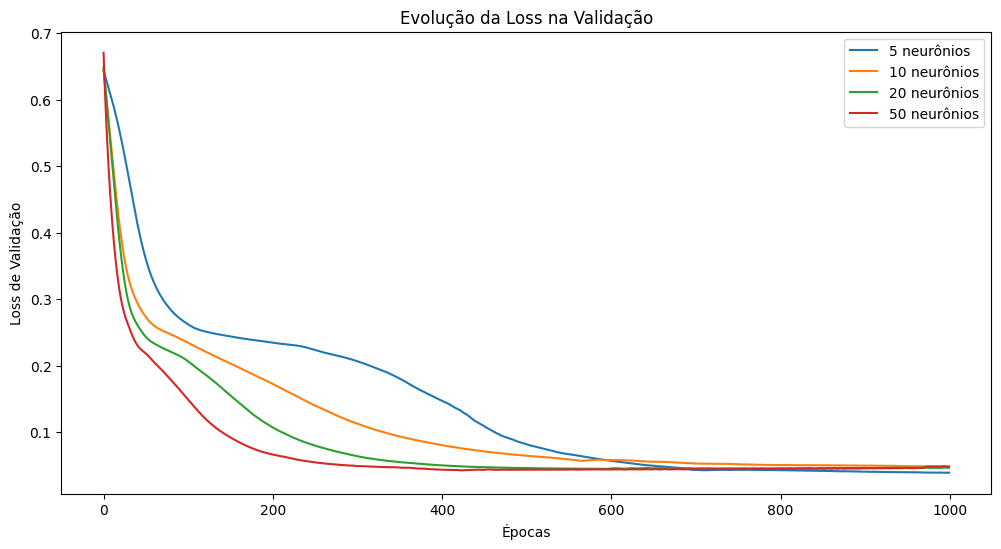

Melhor número de neurônios: 5
Acurácia no conjunto de teste: 0.9867


In [28]:
#Testando diferentes números de neurônios
neurons_list = [5, 10, 20, 50]
best_model = None
best_val_loss = float('inf')
best_neurons = 0

plt.figure(figsize=(12, 6))

for n in neurons_list:
    model, losses, val_losses = train_model(n)
    plt.plot(val_losses, label=f'{n} neurônios')
    
    if min(val_losses) < best_val_loss:
        best_val_loss = min(val_losses)
        best_model = model
        best_neurons = n

plt.xlabel('Épocas')
plt.ylabel('Loss de Validação')
plt.legend()
plt.title('Evolução da Loss na Validação')
plt.savefig("resultados/q3-evolucao-da-loss-na-validacao.png")
plt.show()

# Avaliação no conjunto de teste
best_model.eval()
with torch.no_grad():
    y_test_pred = best_model(X_test)
    y_test_pred = (y_test_pred >= 0.5).float()
    accuracy = (y_test_pred.eq(y_test).sum() / len(y_test)).item()
    
print(f'Melhor número de neurônios: {best_neurons}')
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

In [29]:
# Avaliação no conjunto de teste
best_model.eval()
with torch.no_grad():
    y_test_pred = best_model(X_test)
    y_test_pred = (y_test_pred >= 0.5).float()
    accuracy = (y_test_pred.eq(y_test).sum() / len(y_test)).item()
    
print(f'Melhor número de neurônios: {best_neurons}')
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

Melhor número de neurônios: 5
Acurácia no conjunto de teste: 0.9867


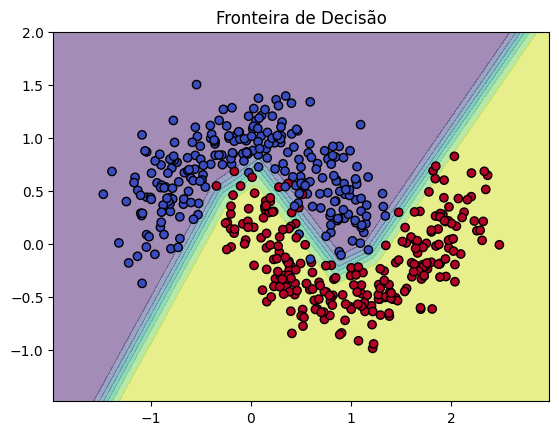

In [30]:
# Visualização da Fronteira de Decisão
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid).numpy().reshape(xx.shape)
    
    plt.contourf(xx, yy, preds, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title('Fronteira de Decisão')
    plt.savefig("resultados/q3-fronteira-de-decisao.png")
    plt.show()

plot_decision_boundary(best_model, X, y)

### Questão 4: Classificação Multiclasse com MLP

Agora, implemente uma rede neural para a classificação de imagens do conjunto MNIST.

Faça os seguintes passos:
- Carregue o conjunto de dados MNIST utilizando Torchvision ou Keras.
- Normalize as imagens e divida em treino (80%) e teste (20%).
- Implemente uma rede neural MLP com:
    - Uma camada oculta de 128 neurônios e ativação ReLU.
    - Uma camada oculta de 64 neurônios  e ativação ReLU.
    - Uma camada de saida com 10 neurônios e ativação softmax.
- Utilize a função de perda CrossEntropyLoss e o otimizador Adam our SGD.
- Treine a rede por 10 épocas e avalie a acurácia no conjunto de teste.
- Exiba algumas previsões feitas pelo modelo, mostrando imagens e suas respectivas classes previstas.

In [31]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [32]:
os.makedirs("resultados", exist_ok=True)

In [33]:
# Definir transformações para normalização
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Carregar dataset MNIST
dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Criar DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [34]:
# Definir a MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten da imagem
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)  # Sem softmax aqui, pois CrossEntropyLoss já aplica
        return x

In [35]:
# Inicializar modelo, loss e otimizador
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Treinamento do modelo
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Época {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

Época 1, Loss: 0.4130
Época 2, Loss: 0.2070
Época 3, Loss: 0.1494
Época 4, Loss: 0.1175
Época 5, Loss: 0.0995
Época 6, Loss: 0.0847
Época 7, Loss: 0.0755
Época 8, Loss: 0.0678
Época 9, Loss: 0.0616
Época 10, Loss: 0.0530


In [36]:
# Avaliação do modelo
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Acurácia no conjunto de teste: {100 * correct / total:.2f}%')

Acurácia no conjunto de teste: 97.14%


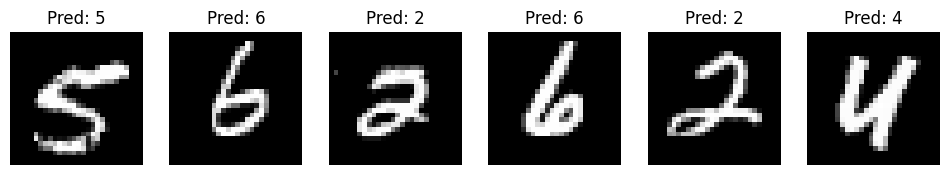

In [37]:
# Exibir algumas previsões
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 6, figsize=(12, 4))
for i in range(6):
    img = images[i].cpu().numpy().squeeze()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Pred: {predicted[i].item()}')
    axes[i].axis('off')
plt.savefig("resultados/q4-predicoes.png")
plt.show()